# Notebook to run basic `scanpy` QC and doublet detection with `scrublet` for SRA Project - PRJEB61891

- **Developed by**: Srivalli Kolla

- **Created date** : 14 October, 2024

- **Modification date** : 23 October, 2024

- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

Env : Scanpy(Python 3.12.4)

# Import sample_names

In [272]:
import anndata
import logging
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import os
import time
import matplotlib.pyplot as plt
from statsmodels.robust.scale import mad as median_abs_deviation
from matplotlib import colors
from matplotlib import rcParams

In [273]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')
timestamp = time.strftime("%d_%m_%Y")

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
array_api_compat    1.7.1
asttokens           NA
attr                23.2.0
attrs               23.2.0
cattr               NA
cattrs              NA
certifi             2024.08.30
cffi                1.16.0
charset_normalizer  3.3.2
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
future              1.0.0
h5py                3.11.0
idna                3.7
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
matplotl

# Import sample_names

In [274]:
path = '../ncbi_sra/data'
files = ['ERR11403589.h5ad',
'ERR11403591.h5ad',
'ERR11403592.h5ad',
'ERR11403595.h5ad',
'ERR11403598.h5ad',
'ERR11403599.h5ad',
'ERR11403600.h5ad',
'ERR11403601.h5ad',
'ERR11403605.h5ad',
'ERR11403606.h5ad']

In [275]:
adata_combined = None
vars_combined = []

for file in files:
    file_path = os.path.join(path, file)
    
    try:

        adata = sc.read_h5ad(file_path)

        sample_name = os.path.basename(file_path).split('.')[0]
        adata.obs['sample_name'] = sample_name


        adata.var_names = adata.var_names.str.split('.').str[0]
        adata.var_names = [f"{name}_{sample_name}" for name in adata.var_names]

        vars_combined.extend(adata.var_names)


        if adata_combined is None:
            adata_combined = adata
        else:
            adata_combined = sc.concat([adata_combined, adata], join='outer', index_unique='-')

        print(f"Successfully read and concatenated: {file}")

    except Exception as e:
        print(f"Error reading {file}: {e}")

unique_var_names = pd.Series(vars_combined).unique()
adata_combined.var_names = unique_var_names[:adata_combined.n_vars] 
adata_combined

Successfully read and concatenated: ERR11403589.h5ad
Successfully read and concatenated: ERR11403591.h5ad
Successfully read and concatenated: ERR11403592.h5ad
Successfully read and concatenated: ERR11403595.h5ad
Successfully read and concatenated: ERR11403598.h5ad
Successfully read and concatenated: ERR11403599.h5ad
Successfully read and concatenated: ERR11403600.h5ad
Successfully read and concatenated: ERR11403601.h5ad
Successfully read and concatenated: ERR11403605.h5ad
Successfully read and concatenated: ERR11403606.h5ad


AnnData object with n_obs × n_vars = 7363200 × 630860
    obs: 'sample_name'

In [276]:
adata_combined

AnnData object with n_obs × n_vars = 7363200 × 630860
    obs: 'sample_name'

In [277]:
adata_combined.obs

,sample_name
AAACACTTGAAACACT-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAACTAC-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAACTCA-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAATACC-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAATGCT-0-0-0-0-0-0-0-0-0,ERR11403589
...,...
TTTGTTGTGTTTCAGT-1,ERR11403606
TTTGTTGTGTTTGAGG-1,ERR11403606
TTTGTTGTGTTTGCAT-1,ERR11403606
TTTGTTGTGTTTGCGC-1,ERR11403606


In [278]:
adata_combined.var

""
ENSG00000290825_ERR11403589
ENSG00000223972_ERR11403589
ENSG00000227232_ERR11403589
ENSG00000278267_ERR11403589
ENSG00000243485_ERR11403589
...
ENSG00000198695_ERR11403606
ENSG00000210194_ERR11403606
ENSG00000198727_ERR11403606
ENSG00000210195_ERR11403606


In [279]:
adata_combined.obs['sample_name'].value_counts()

sample_name
ERR11403589    736320
ERR11403591    736320
ERR11403592    736320
ERR11403595    736320
ERR11403598    736320
ERR11403599    736320
ERR11403600    736320
ERR11403601    736320
ERR11403605    736320
ERR11403606    736320
Name: count, dtype: int64

In [280]:
adata_combined.obs

,sample_name
AAACACTTGAAACACT-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAACTAC-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAACTCA-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAATACC-0-0-0-0-0-0-0-0-0,ERR11403589
AAACACTTGAAATGCT-0-0-0-0-0-0-0-0-0,ERR11403589
...,...
TTTGTTGTGTTTCAGT-1,ERR11403606
TTTGTTGTGTTTGAGG-1,ERR11403606
TTTGTTGTGTTTGCAT-1,ERR11403606
TTTGTTGTGTTTGCGC-1,ERR11403606


### Saving raw data

In [281]:
sample_name_object = adata_combined.copy()
sample_name_object

AnnData object with n_obs × n_vars = 7363200 × 630860
    obs: 'sample_name'

## Compute QC stats

In [282]:
sample_name_object.shape

(7363200, 630860)

### Labelling Mt and Ribo genes

In [283]:
sample_name_object.var

""
ENSG00000290825_ERR11403589
ENSG00000223972_ERR11403589
ENSG00000227232_ERR11403589
ENSG00000278267_ERR11403589
ENSG00000243485_ERR11403589
...
ENSG00000198695_ERR11403606
ENSG00000210194_ERR11403606
ENSG00000198727_ERR11403606
ENSG00000210195_ERR11403606


In [284]:
sample_name_object.var.index = sample_name_object.var.index.str.split('_').str[0]
sample_name_object.var

""
ENSG00000290825
ENSG00000223972
ENSG00000227232
ENSG00000278267
ENSG00000243485
...
ENSG00000198695
ENSG00000210194
ENSG00000198727
ENSG00000210195


In [285]:
sample_name_object.var['ensembl'] = sample_name_object.var.index
sample_name_object.var 

,ensembl
ENSG00000290825,ENSG00000290825
ENSG00000223972,ENSG00000223972
ENSG00000227232,ENSG00000227232
ENSG00000278267,ENSG00000278267
ENSG00000243485,ENSG00000243485
...,...
ENSG00000198695,ENSG00000198695
ENSG00000210194,ENSG00000210194
ENSG00000198727,ENSG00000198727
ENSG00000210195,ENSG00000210195


### Ensembl annotations

In [286]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")

In [287]:
annot.head()

,external_gene_name,start_position,end_position,chromosome_name
ensembl_gene_id,,,,
ENSG00000210049,MT-TF,577,647,MT
ENSG00000211459,MT-RNR1,648,1601,MT
ENSG00000210077,MT-TV,1602,1670,MT
ENSG00000210082,MT-RNR2,1671,3229,MT
ENSG00000209082,MT-TL1,3230,3304,MT


In [288]:
sample_name_object.var

,ensembl
ENSG00000290825,ENSG00000290825
ENSG00000223972,ENSG00000223972
ENSG00000227232,ENSG00000227232
ENSG00000278267,ENSG00000278267
ENSG00000243485,ENSG00000243485
...,...
ENSG00000198695,ENSG00000198695
ENSG00000210194,ENSG00000210194
ENSG00000198727,ENSG00000198727
ENSG00000210195,ENSG00000210195


In [289]:
sample_name_object.var['gene_name'] = sample_name_object.var.index.map(annot['external_gene_name'])
sample_name_object.var.index =sample_name_object.var['gene_name'] 
sample_name_object.var

,ensembl,gene_name
gene_name,,
DDX11L16,ENSG00000290825,DDX11L16
DDX11L1,ENSG00000223972,DDX11L1
WASH7P,ENSG00000227232,WASH7P
MIR6859-1,ENSG00000278267,MIR6859-1
MIR1302-2HG,ENSG00000243485,MIR1302-2HG
...,...,...
MT-ND6,ENSG00000198695,MT-ND6
MT-TE,ENSG00000210194,MT-TE
MT-CYB,ENSG00000198727,MT-CYB


In [290]:
sample_name_object.var['mt'] = sample_name_object.var_names.str.startswith('MT-') 
sample_name_object.var['ribo'] = sample_name_object.var_names.str.startswith(("RPS","RPL"))
sample_name_object.var

,ensembl,gene_name,mt,ribo
gene_name,,,,
DDX11L16,ENSG00000290825,DDX11L16,False,False
DDX11L1,ENSG00000223972,DDX11L1,False,False
WASH7P,ENSG00000227232,WASH7P,False,False
MIR6859-1,ENSG00000278267,MIR6859-1,False,False
MIR1302-2HG,ENSG00000243485,MIR1302-2HG,False,False
...,...,...,...,...
MT-ND6,ENSG00000198695,MT-ND6,True,False
MT-TE,ENSG00000210194,MT-TE,True,False
MT-CYB,ENSG00000198727,MT-CYB,True,False


In [291]:
ribo_counts = sample_name_object.var['ribo'].value_counts()

mt_counts = sample_name_object.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 409190
True: 17750

Counts of Mitochondrial (mt) Genes:
False: 426570
True: 370


In [292]:
sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)

/tmp/ipykernel_486928/2873467954.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
/tmp/ipykernel_486928/2873467954.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)


### Calculating QC metrics per cell

In [293]:
sc.pp.calculate_qc_metrics(sample_name_object,qc_vars = ['mt','ribo'],inplace = True)

In [294]:
sample_name_object

AnnData object with n_obs × n_vars = 7363200 × 630860
    obs: 'sample_name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Sex covariate analysis

### Chr Y genes calculation

In [295]:
sample_name_object.var['gene_name'] = sample_name_object.var['ensembl'].map(annot['external_gene_name'])
sample_name_object.var['chromosome'] = sample_name_object.var['ensembl'].map(annot['chromosome_name'])

In [296]:
sample_name_object.var

,ensembl,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
gene_name,,,,,,,,,,,
DDX11L16,ENSG00000290825,DDX11L16,False,False,0,0.0,0.0,100.0,0,0.0,1
DDX11L1,ENSG00000223972,DDX11L1,False,False,0,0.0,0.0,100.0,0,0.0,1
WASH7P,ENSG00000227232,WASH7P,False,False,0,0.0,0.0,100.0,0,0.0,1
MIR6859-1,ENSG00000278267,MIR6859-1,False,False,0,0.0,0.0,100.0,0,0.0,1
MIR1302-2HG,ENSG00000243485,MIR1302-2HG,False,False,0,0.0,0.0,100.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695,MT-ND6,True,False,0,0.0,0.0,100.0,0,0.0,MT
MT-TE,ENSG00000210194,MT-TE,True,False,0,0.0,0.0,100.0,0,0.0,MT
MT-CYB,ENSG00000198727,MT-CYB,True,False,0,0.0,0.0,100.0,0,0.0,MT


In [297]:
chrY_genes = sample_name_object.var['chromosome'] == "Y"
chrY_genes

gene_name
DDX11L16       False
DDX11L1        False
WASH7P         False
MIR6859-1      False
MIR1302-2HG    False
               ...  
MT-ND6         False
MT-TE          False
MT-CYB         False
MT-TT          False
MT-TP          False
Name: chromosome, Length: 630860, dtype: bool

In [298]:
sample_name_object.obs['percent_chrY'] = np.sum(
    sample_name_object[:, chrY_genes].X, axis = 1) / np.sum(sample_name_object.X, axis = 1) * 100

/tmp/ipykernel_486928/3978536326.py:1: RuntimeWarning: invalid value encountered in divide
  sample_name_object.obs['percent_chrY'] = np.sum(


In [299]:
sample_name_object

AnnData object with n_obs × n_vars = 7363200 × 630860
    obs: 'sample_name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

### XIST counts

In [300]:
sample_name_object.var_names

Index([   'DDX11L16',     'DDX11L1',      'WASH7P',   'MIR6859-1',
       'MIR1302-2HG',   'MIR1302-2',     'FAM138A',      'OR4G4P',
                 nan,     'OR4G11P',
       ...
            'MT-ND4',       'MT-TH',      'MT-TS2',      'MT-TL2',
            'MT-ND5',      'MT-ND6',       'MT-TE',      'MT-CYB',
             'MT-TT',       'MT-TP'],
      dtype='object', name='gene_name', length=630860)

## Calculate cell cycle scores

### Downloading the list of cell cycle genes

In [255]:
!if [ ! -f ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt ]; then curl -o ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

### Marking cell cycle genes

#### Steps followed

1. Loading genes and captilizing 
2. Printing the length of cell cycle genes list
3. Split genes into 2 lists (#First 43 genes,#Gene 43 to end)
4. Filtering cell cycle genes only if present in processed_gene_names
5. Print the list of cell cycle genes observed in our data

In [304]:
cell_cycle_genes = [x.strip() for x in open('../ncbi_sra/data/regev_lab_cell_cycle_genes.txt')]
#cell_cycle_genes = [gene.capitalize() for gene in cell_cycle_genes]
print(len(cell_cycle_genes))

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_name_object.var_names]
print(len(cell_cycle_genes))

97
94


In [305]:
cell_cycle_genes

['MCM5',
 'PCNA',
 'TYMS',
 'FEN1',
 'MCM2',
 'MCM4',
 'RRM1',
 'UNG',
 'GINS2',
 'MCM6',
 'CDCA7',
 'DTL',
 'PRIM1',
 'UHRF1',
 'HELLS',
 'RFC2',
 'RPA2',
 'NASP',
 'RAD51AP1',
 'GMNN',
 'WDR76',
 'SLBP',
 'CCNE2',
 'UBR7',
 'POLD3',
 'MSH2',
 'ATAD2',
 'RAD51',
 'RRM2',
 'CDC45',
 'CDC6',
 'EXO1',
 'TIPIN',
 'DSCC1',
 'BLM',
 'CASP8AP2',
 'USP1',
 'CLSPN',
 'POLA1',
 'CHAF1B',
 'BRIP1',
 'E2F8',
 'HMGB2',
 'CDK1',
 'NUSAP1',
 'UBE2C',
 'BIRC5',
 'TPX2',
 'TOP2A',
 'NDC80',
 'CKS2',
 'NUF2',
 'CKS1B',
 'MKI67',
 'TMPO',
 'CENPF',
 'TACC3',
 'SMC4',
 'CCNB2',
 'CKAP2L',
 'CKAP2',
 'AURKB',
 'BUB1',
 'KIF11',
 'ANP32E',
 'TUBB4B',
 'GTSE1',
 'KIF20B',
 'HJURP',
 'CDCA3',
 'CDC20',
 'TTK',
 'CDC25C',
 'KIF2C',
 'RANGAP1',
 'NCAPD2',
 'DLGAP5',
 'CDCA2',
 'CDCA8',
 'ECT2',
 'KIF23',
 'HMMR',
 'AURKA',
 'PSRC1',
 'ANLN',
 'LBR',
 'CKAP5',
 'CENPE',
 'CTCF',
 'NEK2',
 'G2E3',
 'GAS2L3',
 'CBX5',
 'CENPA']

## Data visualization

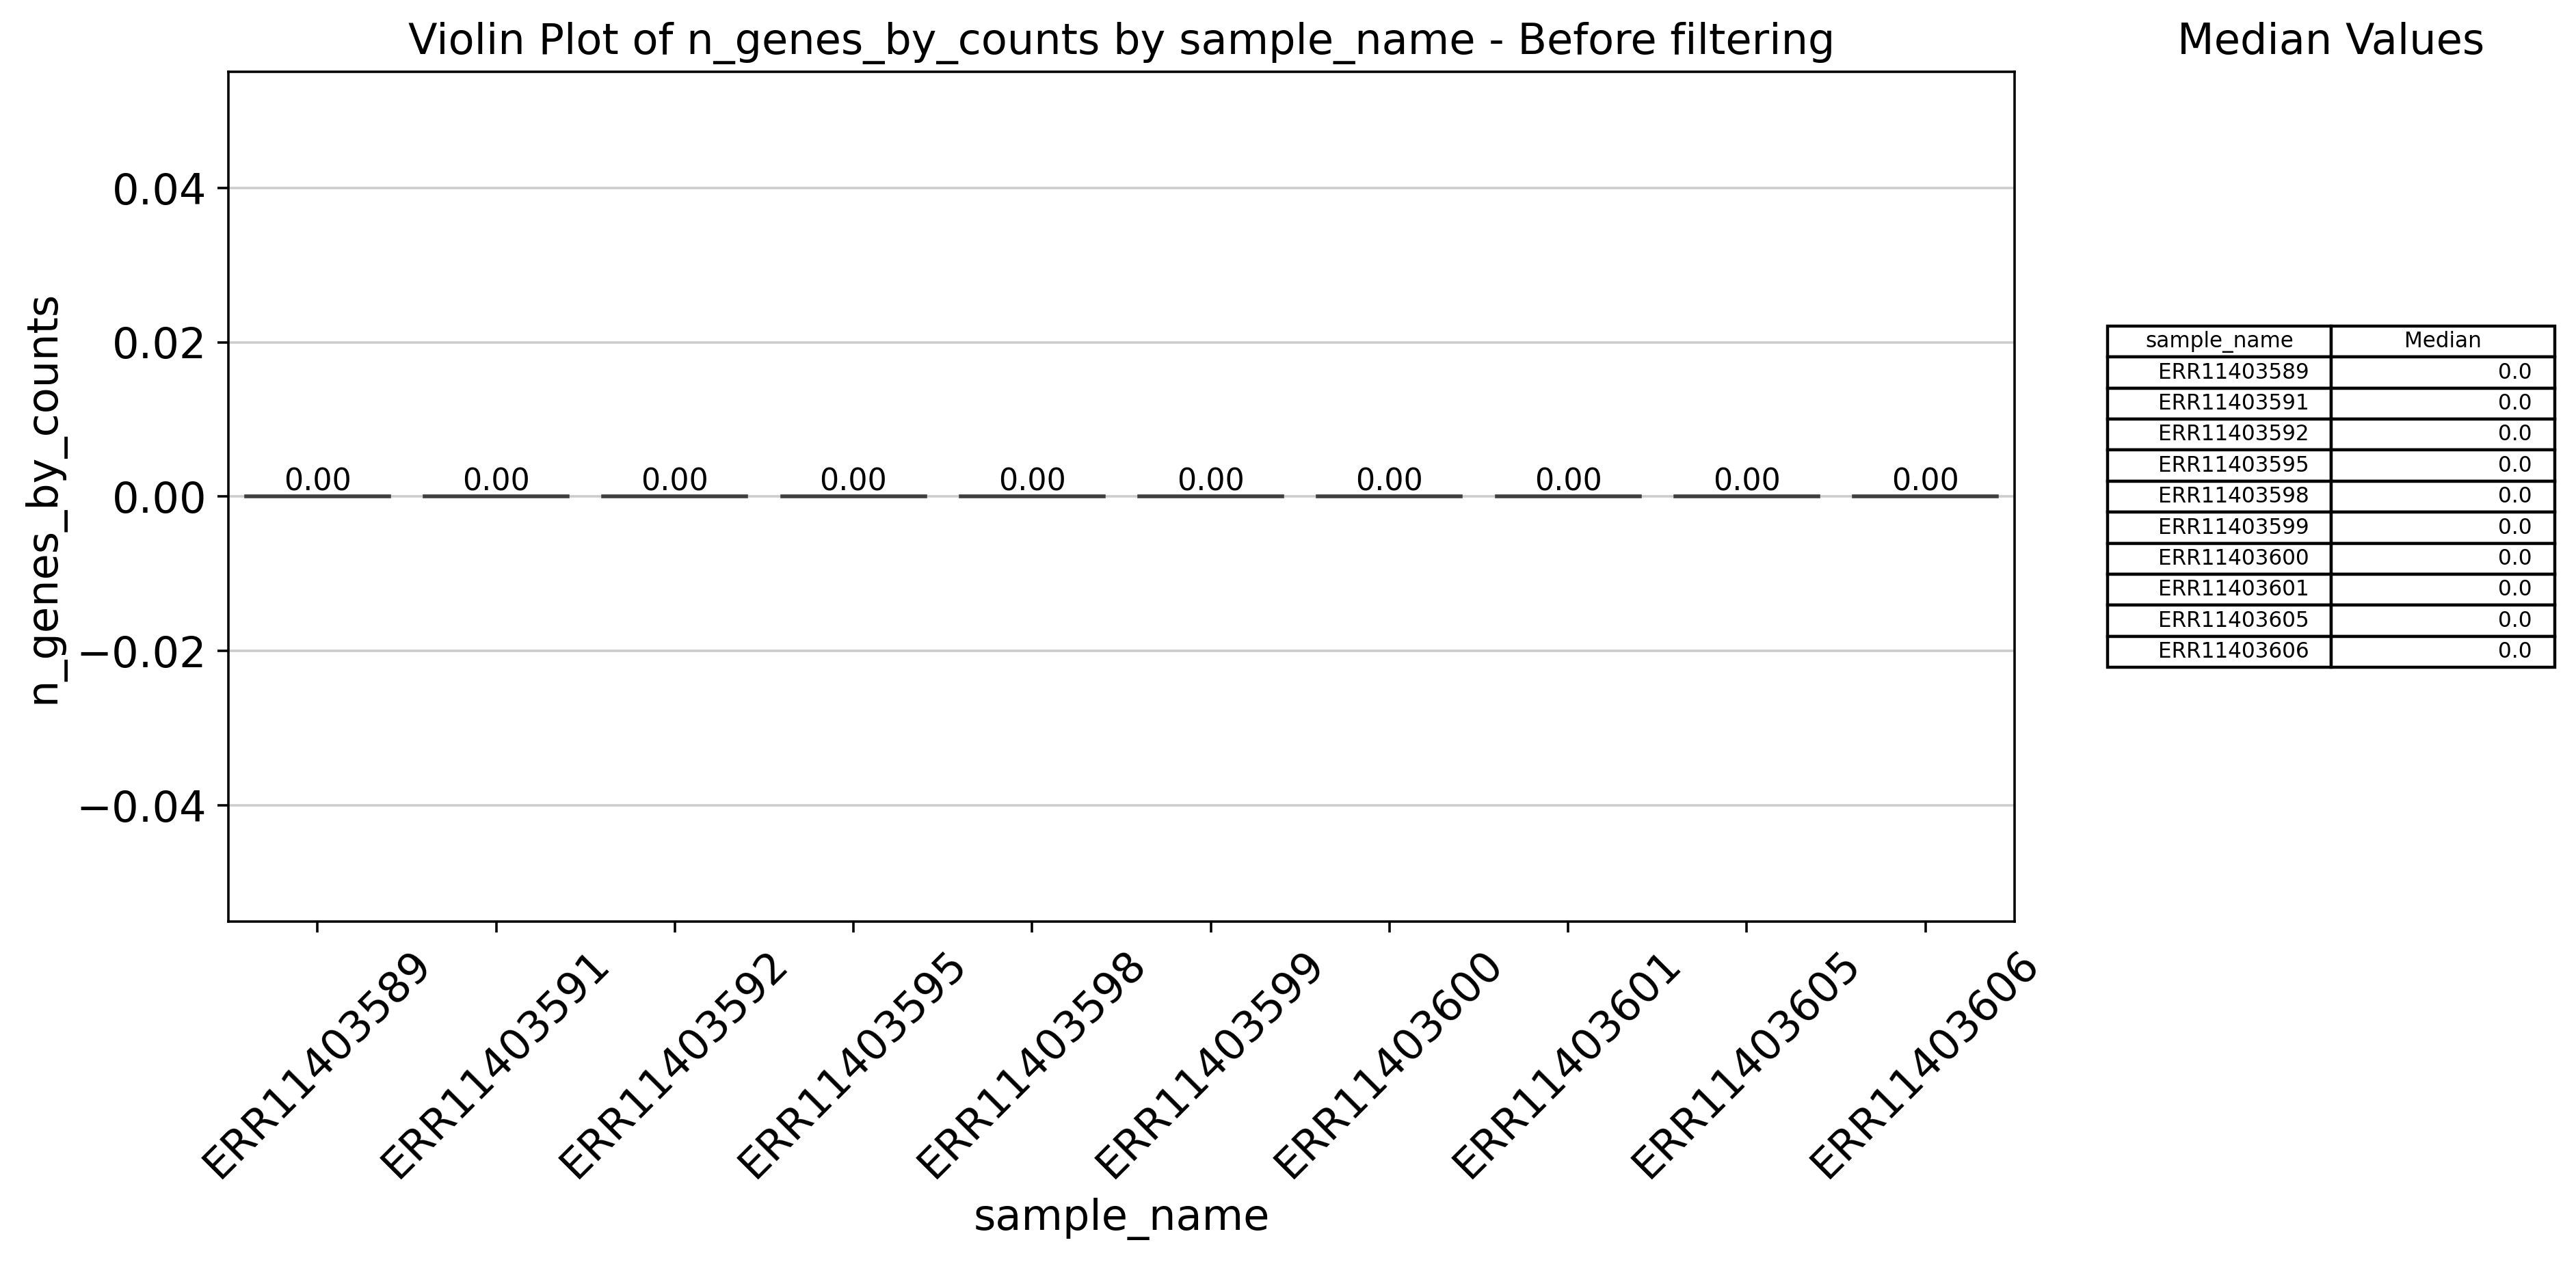

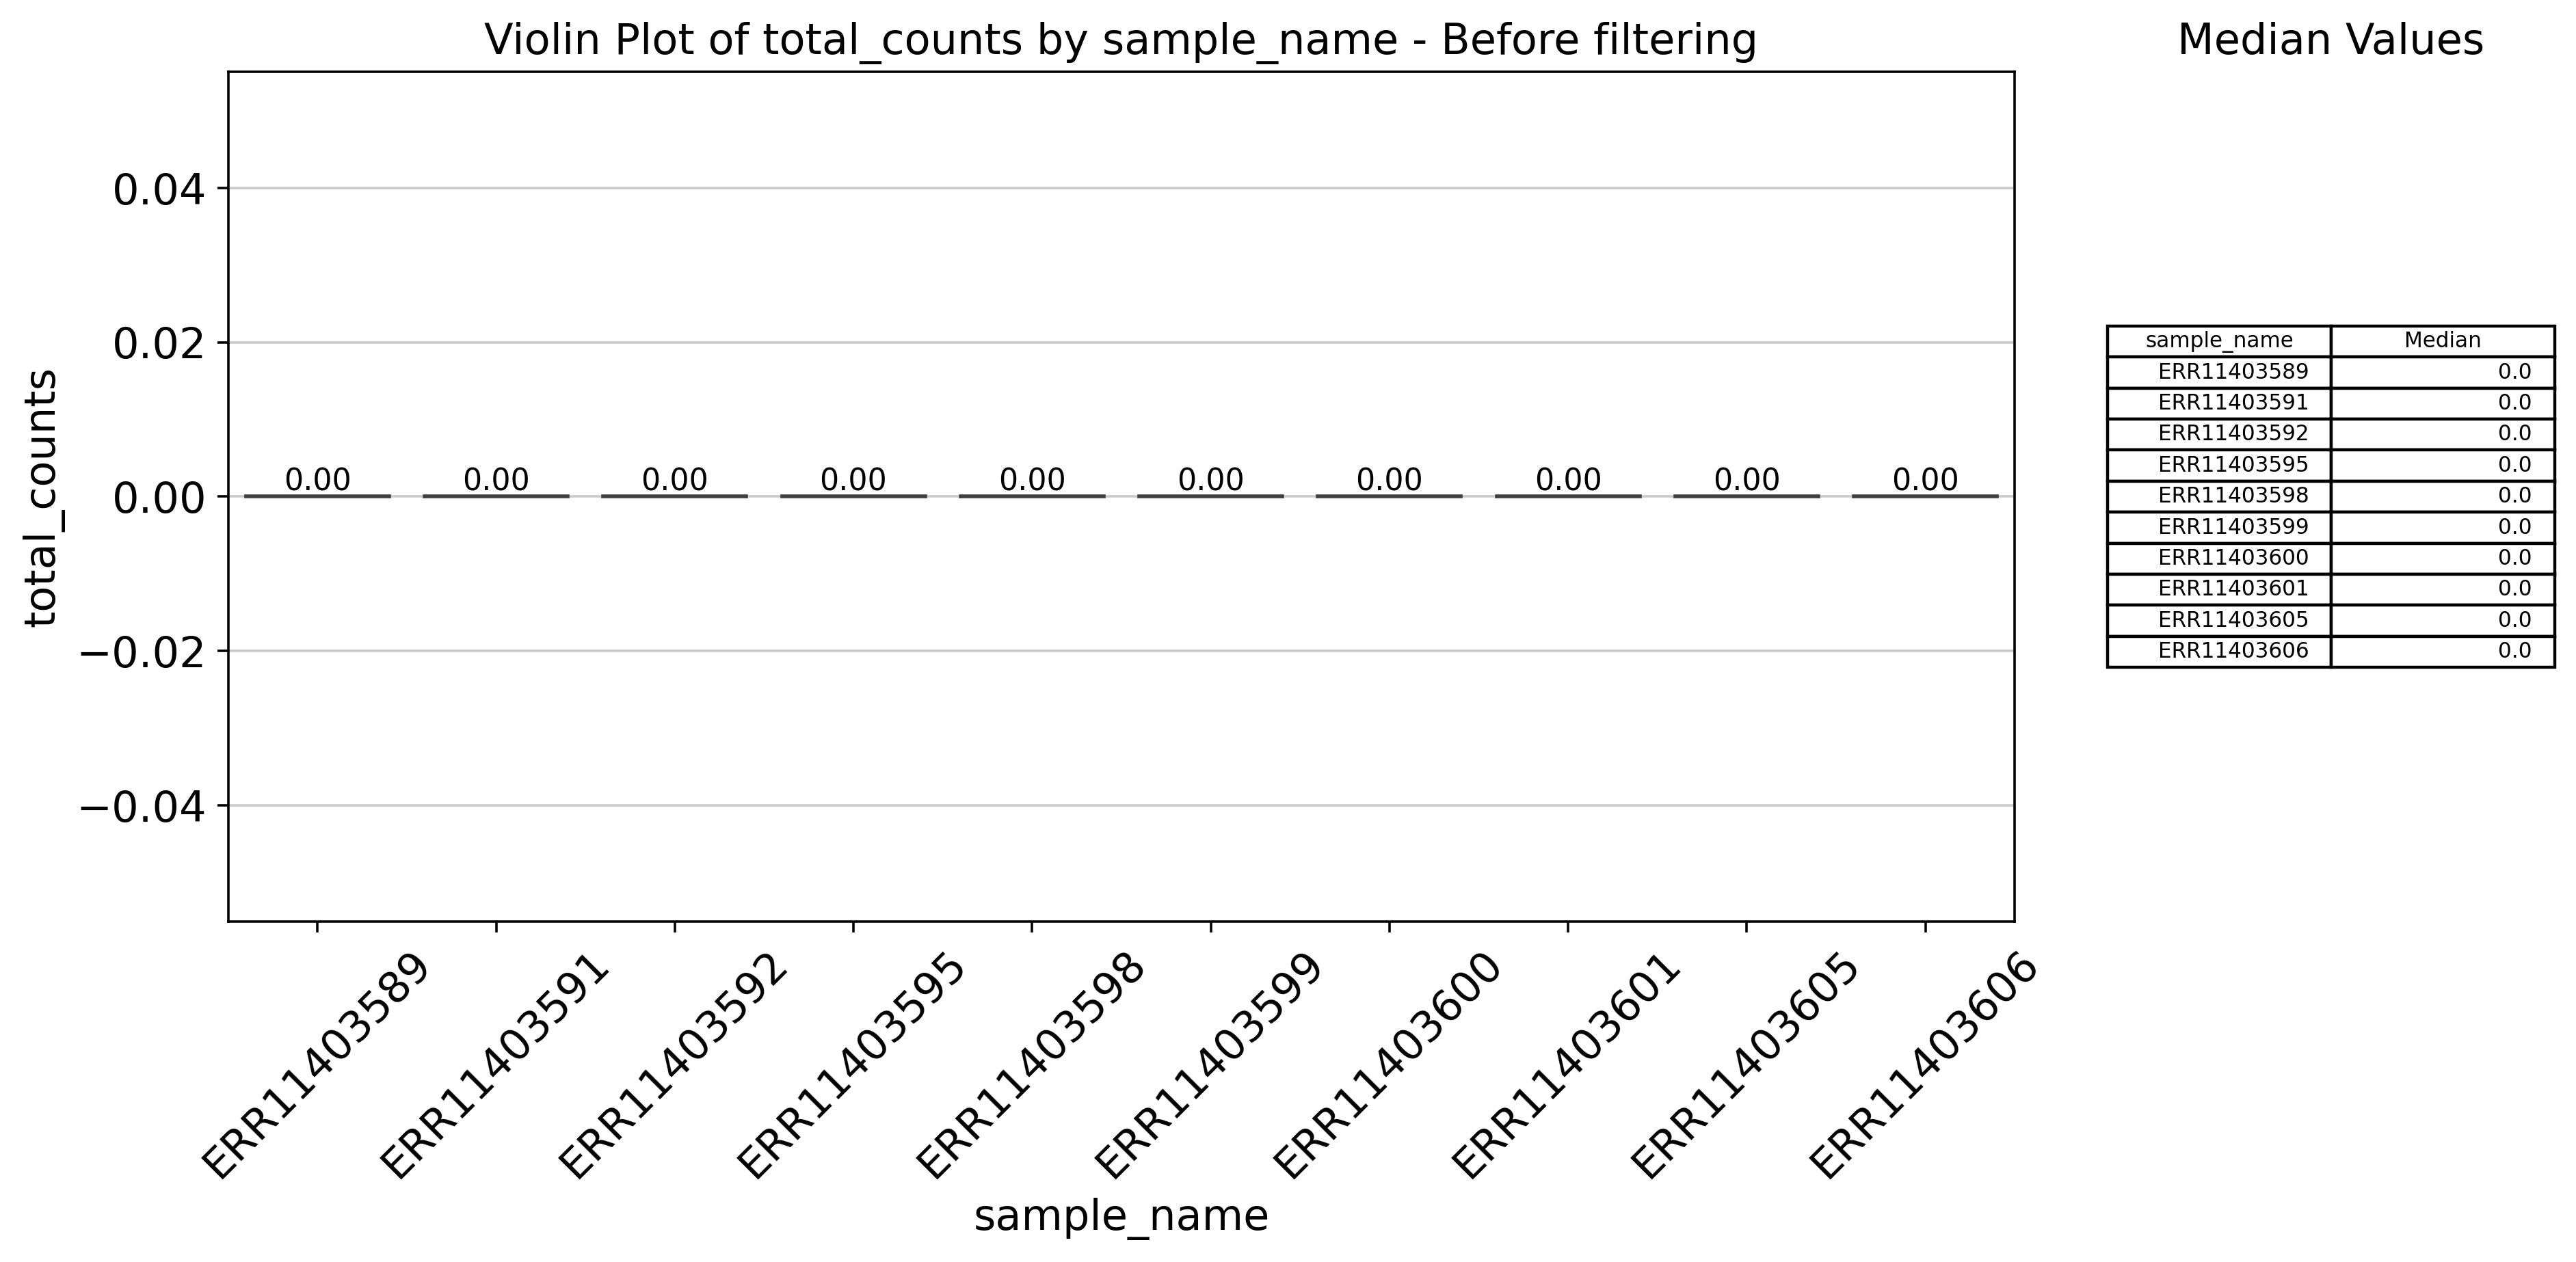

In [308]:
variables = 'n_genes_by_counts', 'total_counts'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=sample_name_object.obs,x = 'sample_name' , y=var, ax=ax[0])
   
    medians = sample_name_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - Before filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()


### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

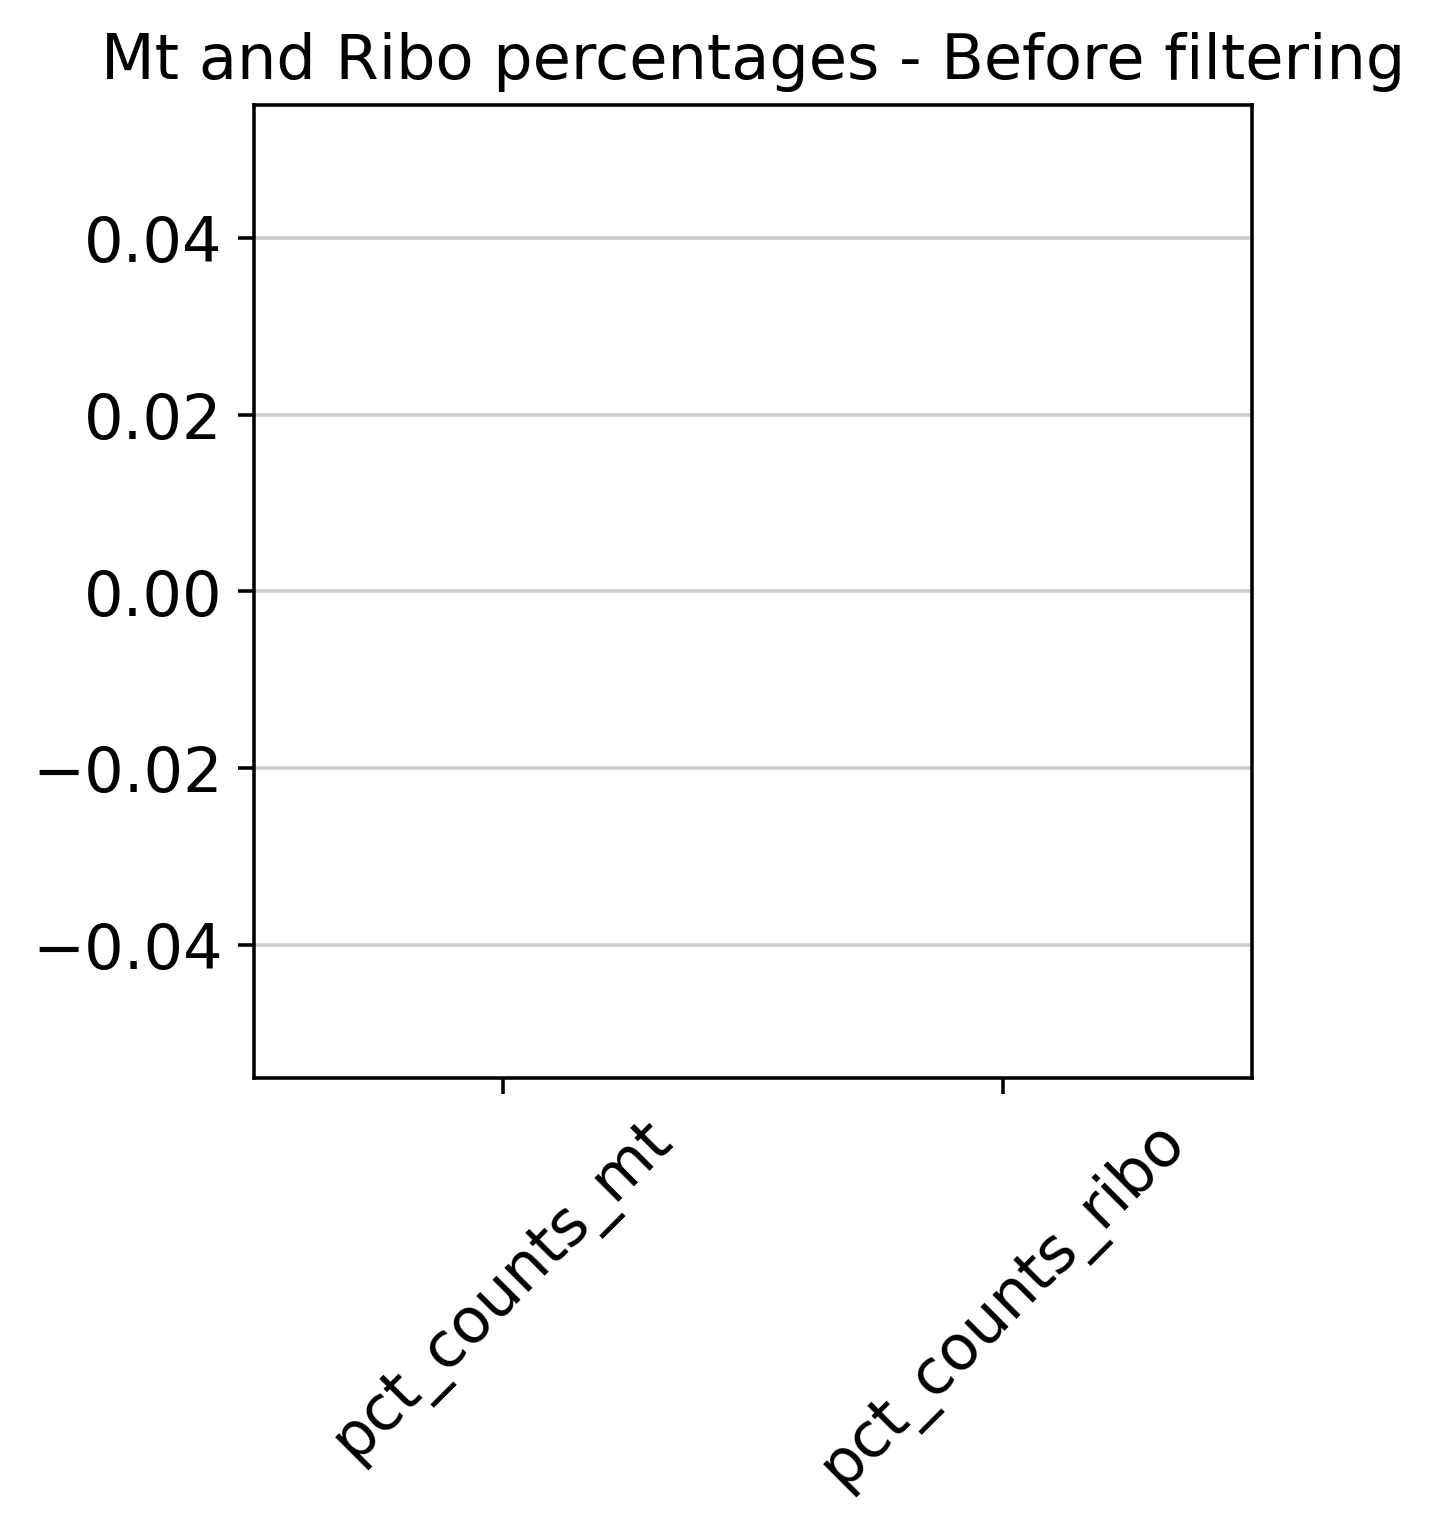

In [309]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=sample_name_object.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

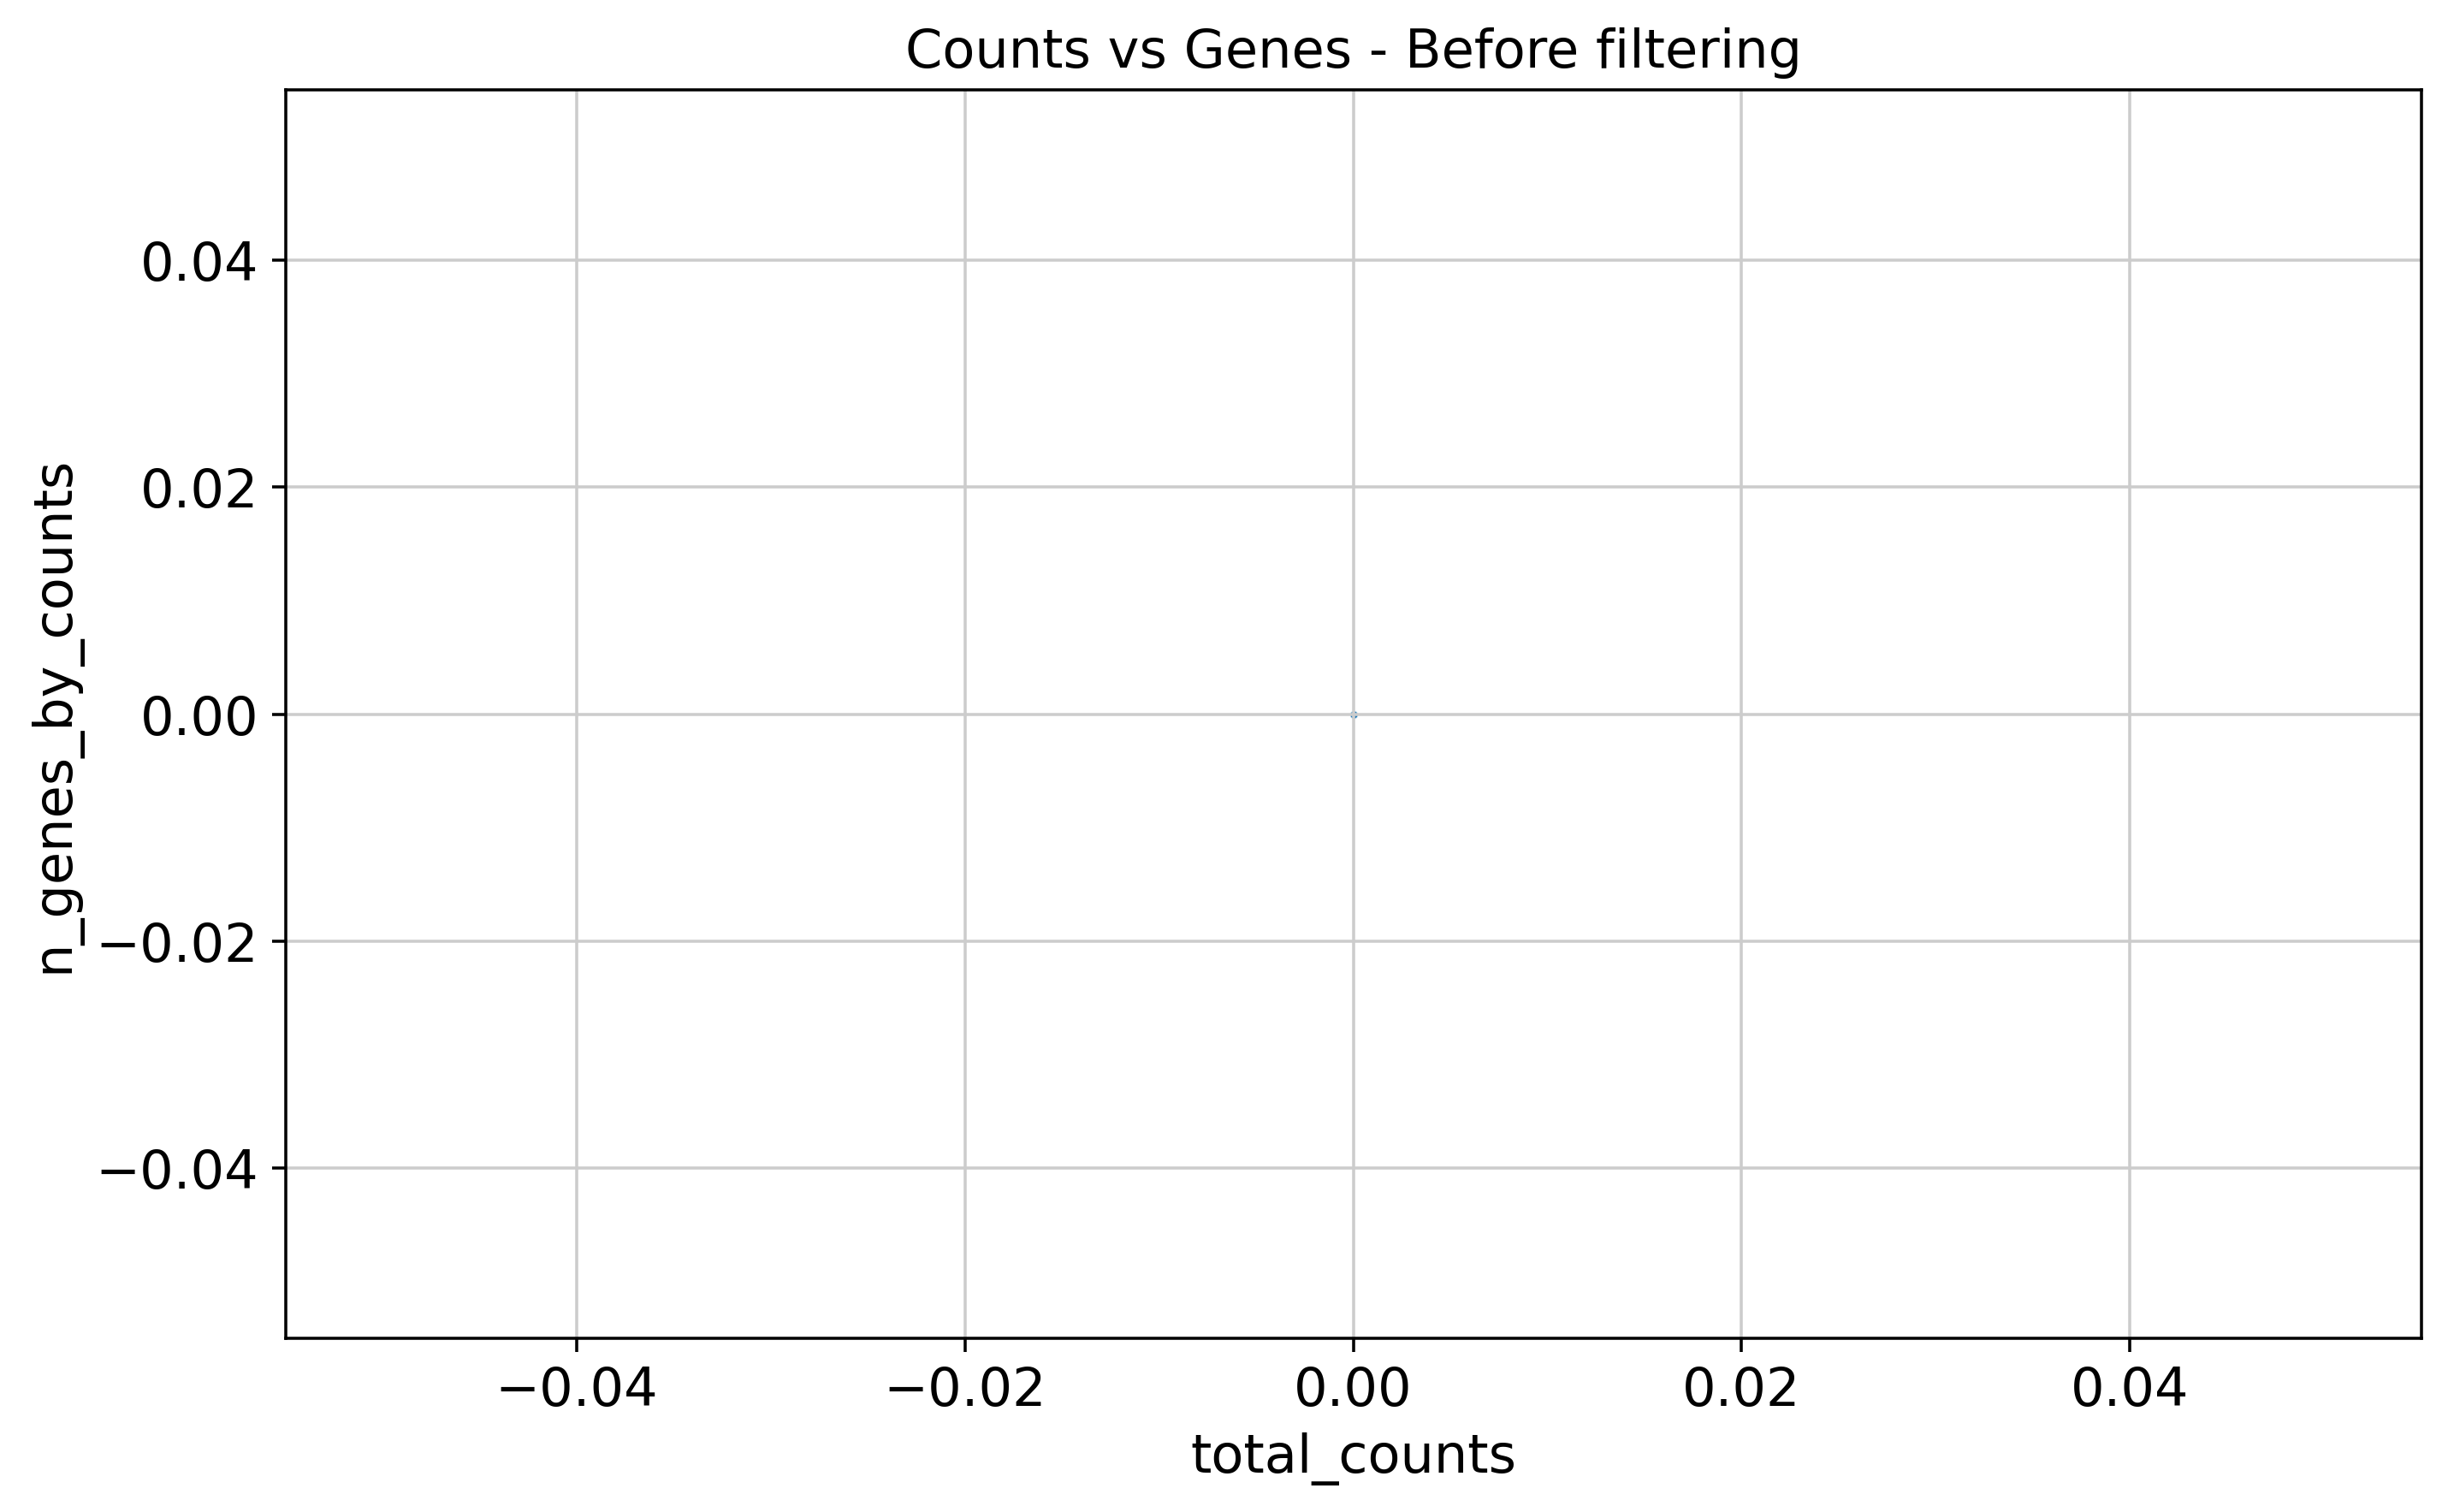

In [310]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=sample_name_object.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
#plt.xticks(range(0, int(max(sample_name_object.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
#plt.yticks(range(0, int(max(sample_name_object.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [313]:
filtered_object = sample_name_object[sample_name_object.obs['n_genes_by_counts'] > 1]
filtered_object = filtered_object[filtered_object.obs['n_genes_by_counts'] < 3000]

filtered_object = filtered_object[filtered_object.obs['total_counts'] > 1]
filtered_object = filtered_object[filtered_object.obs['total_counts'] < 6000]

filtered_object = filtered_object[filtered_object.obs['pct_counts_mt'] < 60]
filtered_object = filtered_object[filtered_object.obs['pct_counts_ribo'] < 20]

#filtered_object = filtered_object[filtered_object.obs['doublet_scores'] < 0.35]

filtered_object

View of AnnData object with n_obs × n_vars = 0 × 630860
    obs: 'sample_name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

In [ ]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=filtered_object.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - After filtering')

In [ ]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'total_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

In [ ]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'n_genes_by_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

In [ ]:
variables = 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'doublet_scores', 'G2M_score', 'S_score' 

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=filtered_object.obs, x='sample_name', y=var, ax=ax[0])
   
    medians = filtered_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - After filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()

## Data Export

In [ ]:
filtered_object.raw = filtered_object.copy()

filtered_object.layers['raw_counts'] = filtered_object.X.copy()

filtered_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(filtered_object, inplace = False)["X"]
)

filtered_object

In [ ]:
filtered_object.var.dtypes

In [ ]:
filtered_object.var['mt'].value_counts()

In [54]:
filtered_object.var['mt'] = filtered_object.var['mt'].astype(str)

In [ ]:
print(filtered_object.var.dtypes)

In [ ]:
filtered_object.var = filtered_object.var.drop(columns=['gene_name'])
filtered_object.var = filtered_object.var.reset_index()
filtered_object.var

In [ ]:
filtered_object.write_h5ad(f'../ncbi_sra/data/PRJEB61891_sra_filtered_sk_{timestamp}.h5ad')